In [ ]:
from tensorflow.keras.models import model_from_json
import numpy as np
from PIL import Image, ImageOps
import cv2
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
model = model_from_json(open("/content/drive/My Drive/Emousic/vgg16_model.json", "r").read())
model.load_weights('/content/drive/My Drive/Emousic/vgg16_model_weights.h5')

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
image_data = Image.open(r'/content/sad.jpg')

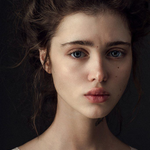

[[47 17 93 93]]
hi
SAD 🙁


In [ ]:
size = (150, 150)
image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
image = np.asarray(image)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(gray_img)
face_haar_cascade = cv2.CascadeClassifier(
        '/content/drive/My Drive/Emousic/haarcascade_frontalface_default.xml')
faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)
print(faces_detected)
for (x, y, w, h) in faces_detected:
        print('hi')
        roi_gray = gray_img[y:y+w, x:x+h]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        img_pixels = img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255
        predictions = model.predict(img_pixels)
        max_index = np.argmax(predictions[0])
        emotions = ('ANGRY 😡', 'HAPPY 😀', 'NEUTRAL 😐', 'SAD 🙁')
        predicted = emotions[max_index]
        print(predicted)


In [ ]:

from selenium import webdriver

emotion = predicted

if emotion == "HAPPY 😀":
    wrds = ["The cure- Friday i'm in love", "The Beatles i want to hold your hand", "Beautiful day"]
    kwrd = ["Cure", "Beatles", "Beautiful"]
    options = webdriver.ChromeOptions()
    options.add_argument("start-maximized")
    options.add_argument("disable-infobars")
    options.add_argument("--disable-extensions")
    wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
    for i, j in zip(wrds, kwrd):
       wd.get("https://www.youtube.com/")
       WebDriverWait(wd, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input#search"))).send_keys(i)
       wd.find_element_by_css_selector("button.style-scope.ytd-searchbox#search-icon-legacy").click()
       WebDriverWait(wd, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "h3.title-and-badge.style-scope.ytd-video-renderer a"))).click()
       WebDriverWait(wd, 10).until(EC.title_contains(j))
       print(wd.current_url) 
        
        
elif emotion == "ANGRY 😡":
    wrds = ["Maroon 5 - Memories", "The Weeknd - Blinding Lights", "Lloyd P White - Burst Part 2"]
    kwrd = ["maroon", "weeknd", "lloyd"]
    options = webdriver.ChromeOptions()
    options.add_argument("start-maximized")
    options.add_argument("disable-infobars")
    options.add_argument("--disable-extensions")
    wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
    for i, j in zip(wrds, kwrd):
       wd.get("https://www.youtube.com/")
       WebDriverWait(wd, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input#se6
       archarch"))).send_keys(i)
       wd.find_element_by_css_selector("button.style-scope.ytd-searchbox#search-icon-legacy").click()
       WebDriverWait(wd, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "h3.title-and-badge.style-scope.ytd-video-renderer a"))).click()
       WebDriverWait(wd, 10).until(EC.title_contains(j))
       print(wd.current_url) 

elif emotion == "SAD 🙁":
    wrds = ["I'll Meet You There - Sapajou", "Relax - Markvard", "Wake Up (feat. ROMY DYA) - Wataboi"]
    kwrd = ["I'll Meet You There", "Relax", "Wake Up"]
    options = webdriver.ChromeOptions()
    options.add_argument("start-maximized")
    options.add_argument("disable-infobars")
    options.add_argument("--disable-extensions")
    wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
    for i, j in zip(wrds, kwrd):
       wd.get("https://www.youtube.com/")
       WebDriverWait(wd, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input#search"))).send_keys(i)
       wd.find_element_by_css_selector("button.style-scope.ytd-searchbox#search-icon-legacy").click()
       WebDriverWait(wd, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "h3.title-and-badge.style-scope.ytd-video-renderer a"))).click()
       WebDriverWait(wd, 10).until(EC.title_contains(j))
       print(wd.current_url) 

elif emotion == "NEUTRAL 😐":
    wrds = ["Becky Hill - Space", "Justin Bieber & benny blanco - Lonely", "Little Mix - Happiness"]
    kwrd = ["Becky Hill", "Justin Bieber & benny blanco", "Little Mix"]
    options = webdriver.ChromeOptions()
    options.add_argument("start-maximized")
    options.add_argument("disable-infobars")
    options.add_argument("--disable-extensions")
    wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
    for i, j in zip(wrds, kwrd):
       wd.get("https://www.youtube.com/")
       WebDriverWait(wd, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "input#search"))).send_keys(i)
       wd.find_element_by_css_selector("button.style-scope.ytd-searchbox#search-icon-legacy").click()
       WebDriverWait(wd, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "h3.title-and-badge.style-scope.ytd-video-renderer a"))).click()
       WebDriverWait(wd, 10).until(EC.title_contains(j))
       print(wd.current_url) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: DeprecationWarning: use options instead of chrome_options


https://www.youtube.com/watch?v=P2mC5i3V0G8
https://www.youtube.com/watch?v=O1TefQahcHg
https://www.youtube.com/watch?v=EChOp4h8VU0


In [ ]:
2